<div style="display: flex; align-items: center;">
    <img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="500" height="auto" height="auto" style="margin-right: 100px;" />
    <div>
        <p><strong>Prof. Dr. Thomas Nagel</strong></p>
        <p>Chair of Soil Mechanics and Foundation Engineering<br>Geotechnical Institute<br>Technische Universität Bergakademie Freiberg.</p>
        <p><a href="https://tu-freiberg.de/en/soilmechanics">https://tu-freiberg.de/en/soilmechanics</a></p>
    </div>
</div>

# Einige Abbildungen zum Thema Zuverlässigkeit, Teilsicherheitskonzept

Erklärungen siehe Vorlesungsunterlagen ...

In [1]:
#HIDDEN
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import integrate
from ipywidgets import widgets
from ipywidgets import interact, interactive

#Some plot settings
import plot_functions.plot_settings

savefigs=False

In [2]:
#HIDDEN
def savefig(title='test.pdf'):
    if (savefigs):
        fig.savefig(title)

In [3]:
#HIDDEN
capacity = np.array([2.1,2.1])
capacity_std = np.array([0.4,0.2])
demand = np.array([1.5,1.5])
demand_std = np.array([0.35,0.15])
FOS = capacity/demand

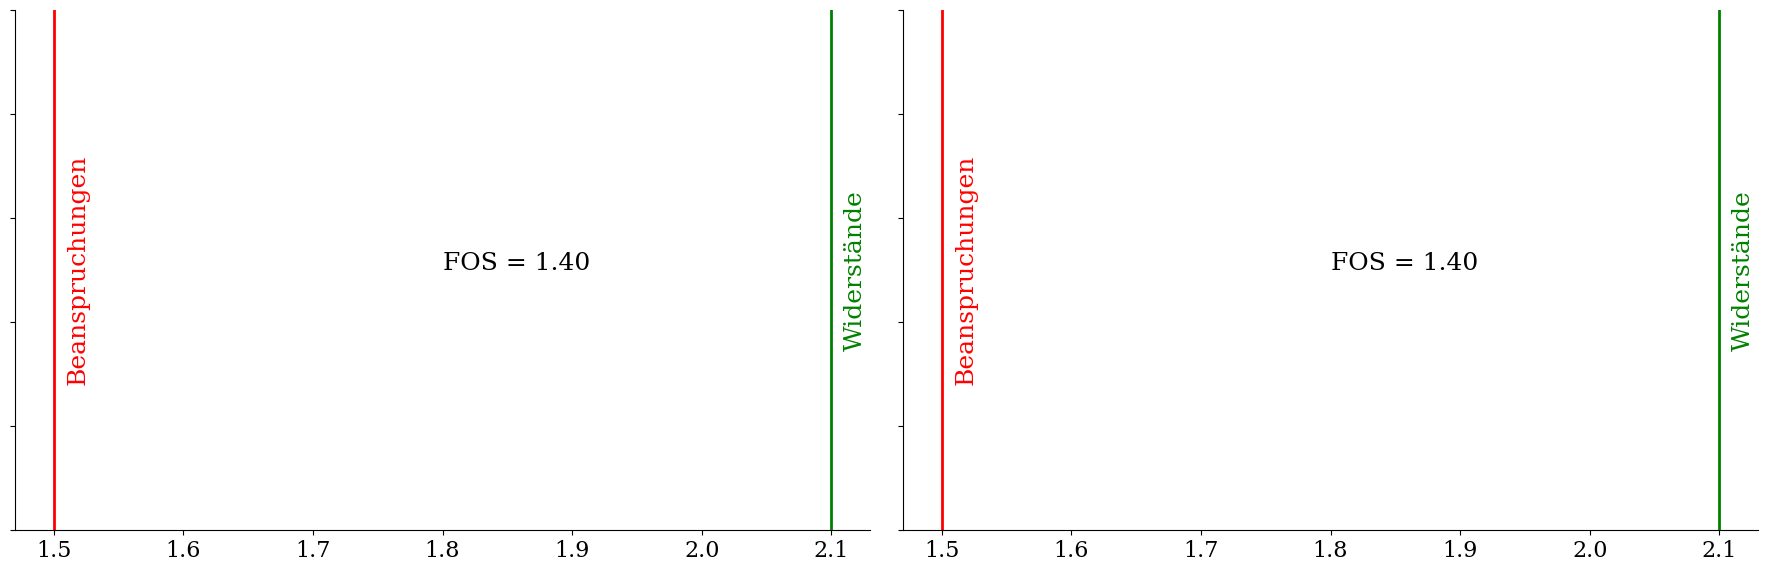

In [4]:
#HIDDEN
fig,ax = plt.subplots(ncols=2,figsize=(18,6))
for i in range(2):
    ax[i].axvline(capacity[i],color='green')
    ax[i].axvline(demand[i],color='red')
    ax[i].text(capacity[i]+0.01, 0.5, "Widerstände", va='center', ha='left', color = 'green',rotation=90, size=18)
    ax[i].text(demand[i]+0.01, 0.5, "Beanspruchungen", va='center', ha='left', color = 'red',rotation=90, size=18)
    ax[i].set_yticklabels([])
    #ax[i].set_xlim(0,2.5)
    ax[i].text((capacity[i]+demand[i])/2,0.5,"FOS = %.2f" %FOS[i], size=18)
#fig.set_figwidth(14)
fig.tight_layout()
savefig('../Bilder/Sicherheit_Mittelwerte.pdf');

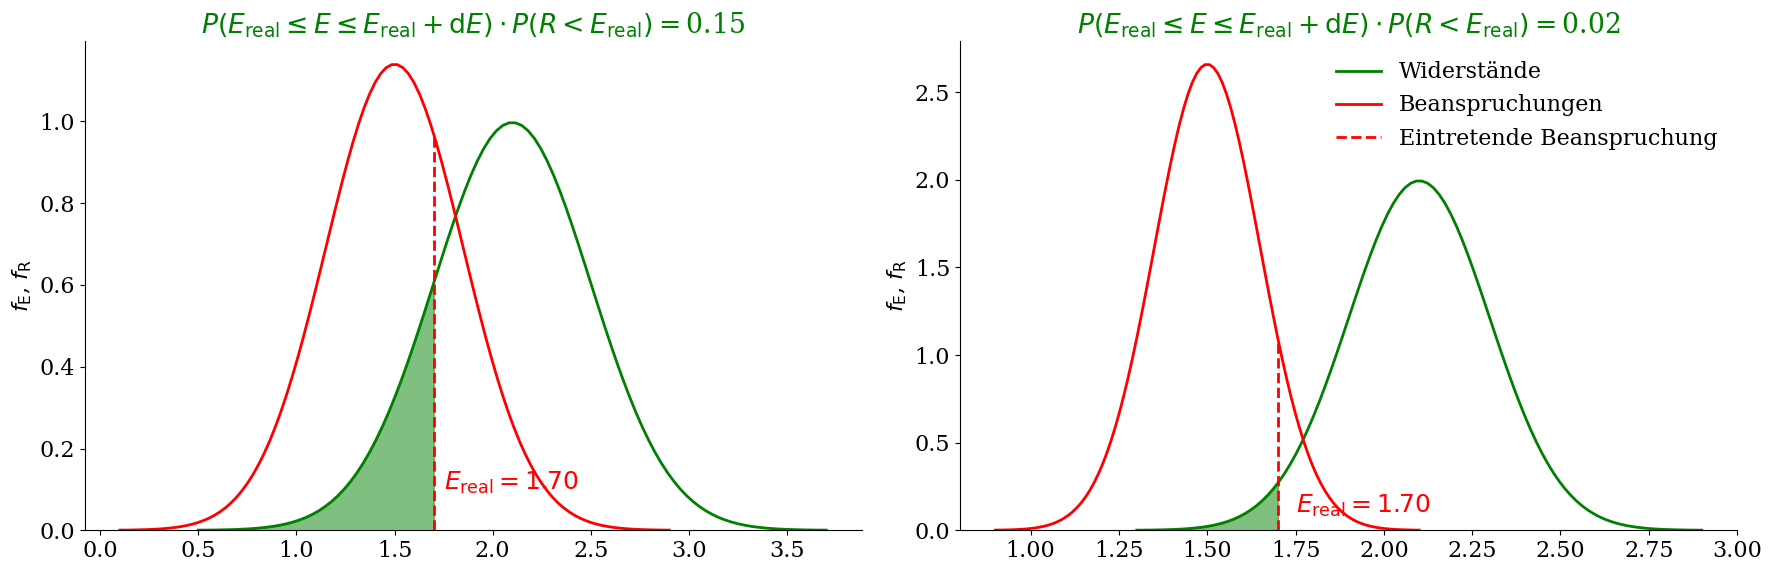

In [5]:
#HIDDEN
plot_range_std = 4.
actual_demand = 1.7
fig,ax = plt.subplots(ncols=2,figsize=(18,6))
for i in range(2):
    x = np.linspace(capacity[i]-plot_range_std*capacity_std[i],capacity[i]+plot_range_std*capacity_std[i],100)
    ax[i].plot(x,stats.norm.pdf(x,capacity[i],capacity_std[i]),color='green',label=r'Widerstände')
    x = np.linspace(demand[i]-plot_range_std*demand_std[i],demand[i]+plot_range_std*demand_std[i],100)
    ax[i].plot(x,stats.norm.pdf(x,demand[i],demand_std[i]),color='red',label=r'Beanspruchungen')
    ax[i].plot([actual_demand,actual_demand],[0,stats.norm.pdf(actual_demand,demand[i],demand_std[i])],
               color='red',ls='--',label=r'Eintretende Beanspruchung')
    ax[i].set_ylim(0)
    x = np.linspace(capacity[i]-plot_range_std*capacity_std[i],actual_demand,100)
    ax[i].fill_between(x,stats.norm.pdf(x,capacity[i],capacity_std[i]),alpha=0.5,color='green')
    ax[i].text(actual_demand+0.05,0.1,r"$E_\mathrm{real} = %.2f$" %actual_demand,size=18,color='red')
    failure_prob = stats.norm.pdf(actual_demand,demand[i],demand_std[i])*stats.norm.cdf(actual_demand,capacity[i],capacity_std[i])
    ax[i].set_ylabel(r'$f_\mathrm{E}$, $f_\mathrm{R}$')
    ax[i].set_title(r"$P(E_\mathrm{real}\leq E\leq E_\mathrm{real}+\mathrm{d}E)\cdot P(R<E_\mathrm{real}) = $%.2f" %failure_prob,
              color='green')
    #ax[i].axvline(demand[i],color='red',label=r'demand')
    #ax[i].text(capacity[i]+0.01, 0.5, "capacity", va='center', ha='left', color = 'green',rotation=90, size=14)
    #ax[i].text(demand[i]+0.01, 0.5, "demand", va='center', ha='left', color = 'red',rotation=90, size=14)
    #ax[i].set_yticklabels([])
    #ax[i].set_xlim(0,2.5)
    #ax[i].text((capacity[i]+demand[i])/2,0.5,"FOS = %.2f" %FOS[i], size=14)
#fig.set_figwidth(14)
ax[1].legend(frameon=False)
fig.tight_layout()
savefig('../Bilder/Konzept_Zuverlaessigkeit.pdf')

In [6]:
#HIDDEN
Probability_of_failure = np.array([0.,0.])
for i in range(2):
    temp = integrate.quad(lambda x: stats.norm.pdf(x,demand[i],demand_std[i])*stats.norm.cdf(x,capacity[i],capacity_std[i]), -100, 100)
    print(temp)
    Probability_of_failure[i] = temp[0]

(0.12947738482910748, 2.0676637832450773e-09)
(0.008197535924596105, 8.797426994371026e-09)


In [7]:
#HIDDEN
print("Case 1: FOS: %.2f; P(F): %.2f per cent" %(FOS[0],Probability_of_failure[0]*100.))
print("Case 2: FOS: %.2f; P(F): %.2f per cent" %(FOS[1],Probability_of_failure[1]*100.))

Case 1: FOS: 1.40; P(F): 12.95 per cent
Case 2: FOS: 1.40; P(F): 0.82 per cent


The probability of failure is given as

$$
    P(F) = \int \limits_{-\infty}^\infty f_\text{D}(x)\, F_\text{C}(x)\,\text{d} x
$$

It can also be computed from the reliability index $\beta$ via the cumulative distribution function of a normal distribution centered around a mean $\mu = 0$ with a standard deviation $\sigma = 1$, $\Phi$, via

$$
    P(F) = 1 - \Phi(\beta) \quad \text{where} \quad \beta = \frac{\mu_C - \mu_D}{\sqrt{\sigma_C^2 + \sigma_D^2}}
$$

In [8]:
#HIDDEN
def reliability_index(C,D,C_std,D_std):
    return (C-D)/np.sqrt(C_std**2 + D_std**2)

def RI_to_PF(beta):
    return 1. - stats.norm.cdf(beta,0,1)

In [9]:
#HIDDEN
RI = np.array([0.,0.])
PF_RI = np.array([0.,0.])
for i in range(2):
    RI[i] = reliability_index(capacity[i],demand[i],capacity_std[i],demand_std[i])
    PF_RI[i] = RI_to_PF(RI[i])

In [10]:
#HIDDEN
print("Case 1: FOS: %.2f; P(F): %.2f per cent; RI = %.2f; P(F) from RI: %.2f per cent" 
      %(FOS[0],Probability_of_failure[0]*100.,RI[0],PF_RI[0]*100.))
print("Case 2: FOS: %.2f; P(F): %.2f per cent; RI = %.2f; P(F) from RI: %.2f per cent" 
      %(FOS[1],Probability_of_failure[1]*100.,RI[1],PF_RI[1]*100))

Case 1: FOS: 1.40; P(F): 12.95 per cent; RI = 1.13; P(F) from RI: 12.95 per cent
Case 2: FOS: 1.40; P(F): 0.82 per cent; RI = 2.40; P(F) from RI: 0.82 per cent


In [11]:
#HIDDEN
capacity = 2.2
demand = 0.8
capacity_std = 0.2
demand_std = 0.15
x = np.linspace(0,3,1000)
F = stats.norm.cdf(x,capacity,capacity_std)

In [12]:
#HIDDEN
def find_nearest_entry(array,value):
    idx = (np.abs(array - value)).argmin()
    return idx

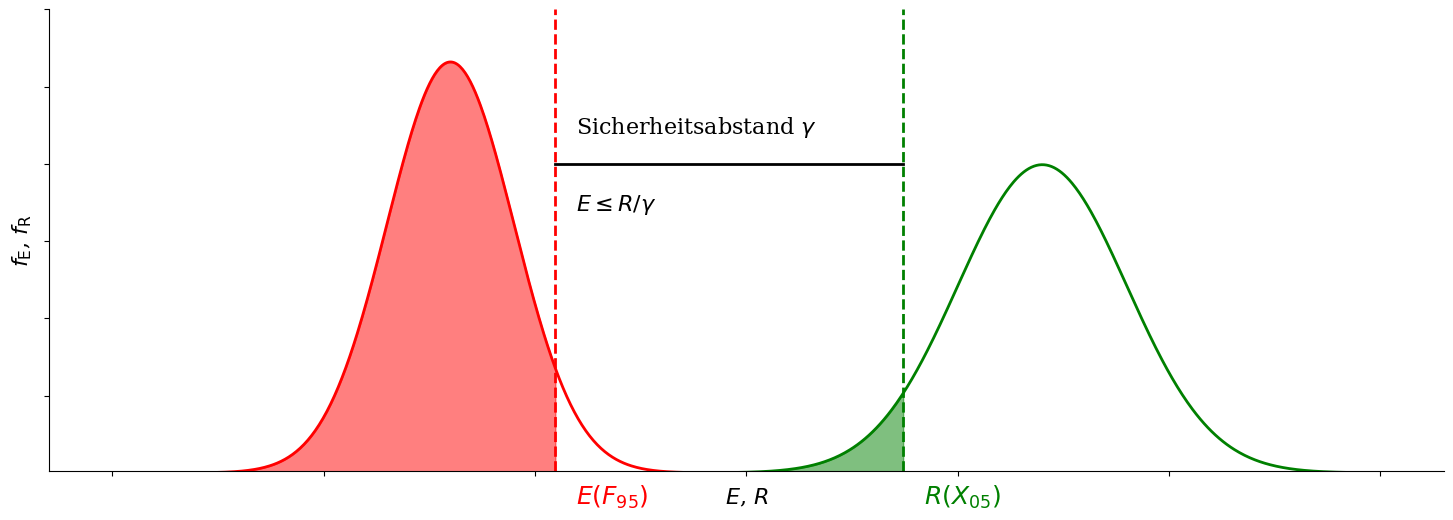

In [13]:
#HIDDEN
x = np.linspace(0,3,1000)

F_C = stats.norm.cdf(x,capacity,capacity_std)
F_D = stats.norm.cdf(x,demand,demand_std)

D_95 = x[find_nearest_entry(F_D,0.95)]
C_5 = x[find_nearest_entry(F_C,0.05)]

fig, ax = plt.subplots(figsize=(18,6))
ax.plot(x,stats.norm.pdf(x,capacity,capacity_std),color='green',label=r'Widerstände')
ax.plot(x,stats.norm.pdf(x,demand,demand_std),color='red',label=r'Beanspruchungen')

ax.axvline(D_95,color='red',ls='--')
ax.text(D_95+0.05,-0.2,r"$E(F_{95})$",size=18,color='red')

ax.axvline(C_5,color='green',ls='--')
ax.text(C_5+0.05,-0.2,r"$R(X_{05})$",size=18,color='green')

x = np.linspace(0,C_5,100)
ax.fill_between(x,stats.norm.pdf(x,capacity,capacity_std),alpha=0.5,color='green')
x = np.linspace(0,D_95,100)
ax.fill_between(x,stats.norm.pdf(x,demand,demand_std),alpha=0.5,color='red')

ax.plot([D_95,C_5],[2,2],color='black')
ax.text(D_95+0.05,2.2,r'Sicherheitsabstand $\gamma$')
ax.text(D_95+0.05,1.7,r'$E \leq R/\gamma$')

ax.set_ylim(0.01,3)
ax.set_ylabel(r'$f_\mathrm{E}$, $f_\mathrm{R}$')
ax.set_xlabel(r'$E$, $R$')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
savefig('../Bilder/globales_Konzept.pdf')

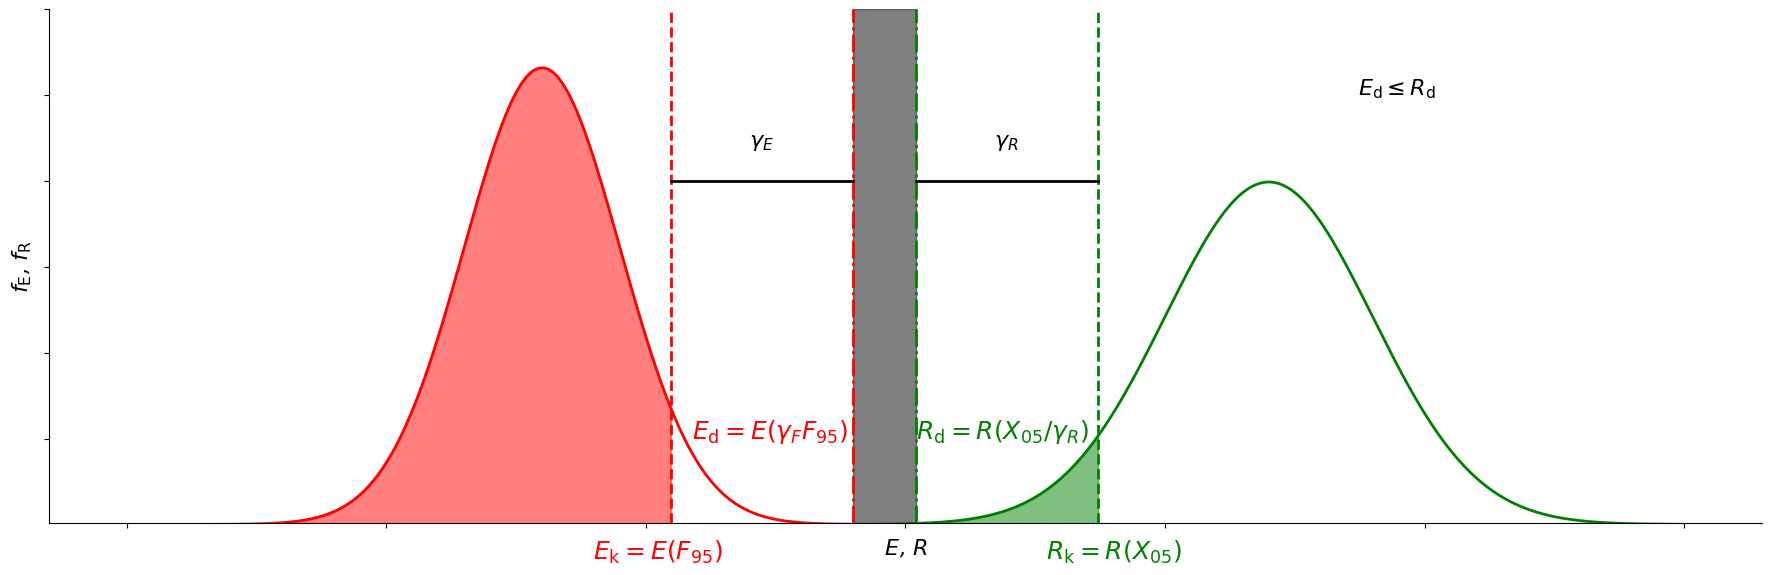

In [14]:
#HIDDEN
x = np.linspace(0,3,1000)

F_C = stats.norm.cdf(x,capacity,capacity_std)
F_D = stats.norm.cdf(x,demand,demand_std)

D_95 = x[find_nearest_entry(F_D,0.95)]
C_5 = x[find_nearest_entry(F_C,0.05)]

fig, ax = plt.subplots(figsize=(18,6))
ax.plot(x,stats.norm.pdf(x,capacity,capacity_std),color='green',label=r'Widerstände')
ax.plot(x,stats.norm.pdf(x,demand,demand_std),color='red',label=r'Beanspruchungen')

ax.axvline(D_95,color='red',ls='--')
ax.text(D_95-0.15,-0.2,r"$E_\mathrm{k} = E(F_{95})$",size=18,color='red')

ax.axvline(D_95+0.35,color='red',ls='-.')
ax.text(D_95+0.04,0.5,r"$E_\mathrm{d} = E(\gamma_F F_{95})$",size=18,color='red')

ax.axvline(C_5,color='green',ls='--')
ax.text(C_5-0.1,-0.2,r"$R_\mathrm{k} = R(X_{05})$",size=18,color='green')

ax.axvline(C_5-0.35,color='green',ls='-.')
ax.text(C_5-0.35,0.5,r"$R_\mathrm{d} = R(X_{05}/\gamma_R)$",size=18,color='green')

x = np.linspace(0,C_5,100)
ax.fill_between(x,stats.norm.pdf(x,capacity,capacity_std),alpha=0.5,color='green')
x = np.linspace(0,D_95,100)
ax.fill_between(x,stats.norm.pdf(x,demand,demand_std),alpha=0.5,color='red')

ax.plot([D_95,D_95+0.35],[2,2],color='black')
ax.text(D_95+0.15,2.2,r'$\gamma_E$')

ax.plot([C_5,C_5-0.35],[2,2],color='black')
ax.text(C_5-0.2,2.2,r'$\gamma_R$')

ax.text(C_5+0.5,2.5,r'$E_\mathrm{d} \leq R_\mathrm{d}$')

x = np.linspace(D_95+0.35,C_5-0.35,100)
ax.fill_between(x,3,alpha=0.5,color='black')


ax.set_ylim(0.01,3)
ax.set_ylabel(r'$f_\mathrm{E}$, $f_\mathrm{R}$')
ax.set_xlabel(r'$E$, $R$')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
fig.tight_layout()
savefig('../Bilder/Teilsicherheitskonzept.pdf')

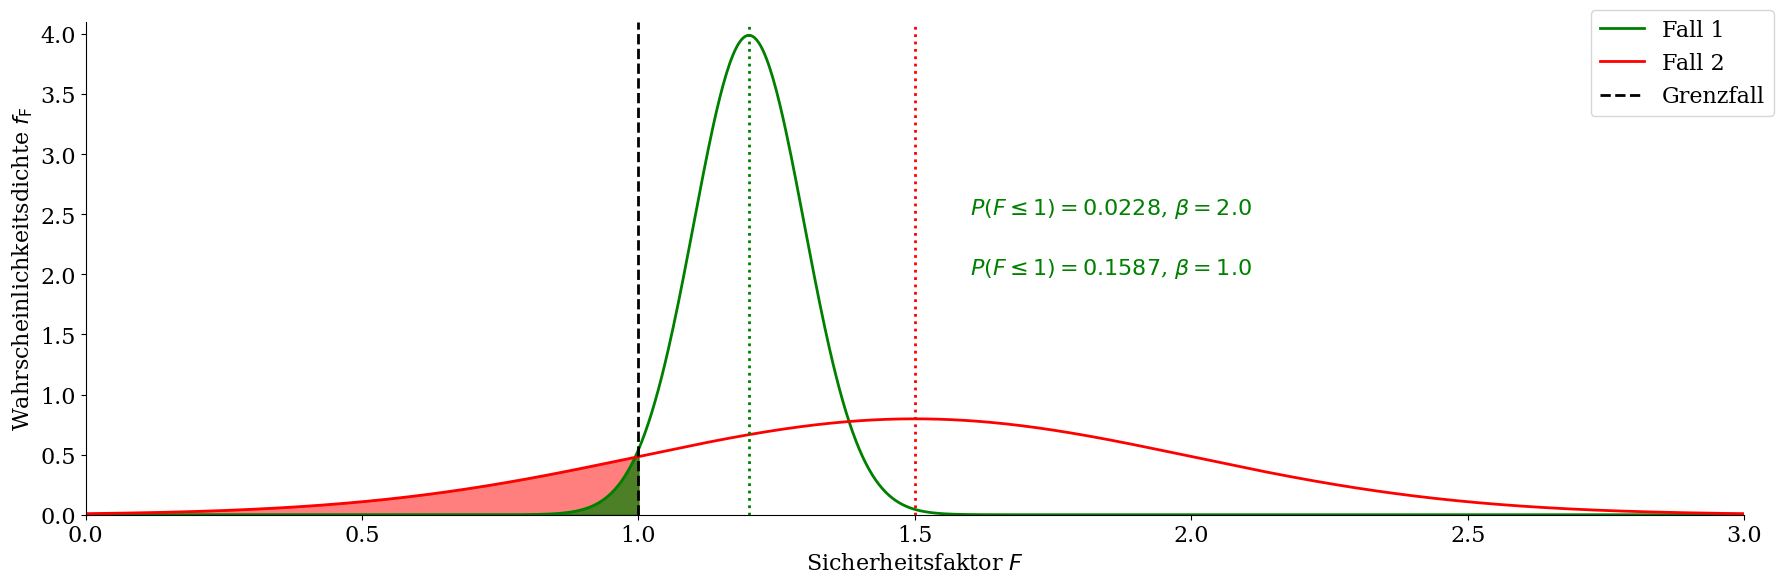

In [15]:
#HIDDEN
x = np.linspace(0.0,3,1000)

fig, ax = plt.subplots(figsize=(18,6))
ax.plot(x,stats.norm.pdf(x,1.2,0.1),color='green',label=r'Fall 1')
ax.plot(x,stats.norm.pdf(x,1.5,0.5),color='red',label=r'Fall 2')

ax.axvline(1,color='black',ls='--',label=r'Grenzfall')
ax.axvline(1.2,color='green',ls=':')
ax.axvline(1.5,color='red',ls=':')

x = np.linspace(0,1,100)
ax.fill_between(x,stats.norm.pdf(x,1.5,0.5),alpha=0.5,color='red')
ax.fill_between(x,stats.norm.pdf(x,1.2,0.1),alpha=0.7,color='green')
ax.text(1.6,2.5,r"$P(F\leq 1) = %.4f$, $\beta = %.1f$" %(stats.norm.cdf(1.0,1.2,0.1),(1.2-1)/0.1),color='green')
ax.text(1.6,2.0,r"$P(F\leq 1) = %.4f$, $\beta = %.1f$" %(stats.norm.cdf(1.0,1.5,0.5),(1.5-1)/0.5),color='green')

ax.set_ylim(0.0,4.1)
ax.set_xlim(0.0,3.0)
ax.set_ylabel(r'Wahrscheinlichkeitsdichte $f_\mathrm{F}$')
ax.set_xlabel(r'Sicherheitsfaktor $F$')

fig.legend()
fig.tight_layout()
savefig('../Bilder/Sicherheitsfaktor_prob.pdf')

Hier ergibt sich

$$
    \beta = \frac{E(F) - 1.0}{\sigma(F)}
$$

Im Folgenden verwenden wir die Grenzgleichung $Z = R - E$, woraus wir 

$$
    \beta = \frac{\mu_Z}{\sigma_Z}
$$

ableiten.

Dabei verwenden wir

$$
    \mu_Z = \mu_R - \mu_E \quad \text{und} \quad \sigma_Z = \sqrt{\sigma_E^2 + \sigma_R^2 - 2 \varrho_{RE} \sigma_E \sigma_R}
$$

In [16]:
#HIDDEN
def plot_interactive_reliability():
    @interact(mu_e=widgets.FloatText(value=4,description=r'$\mu_E$'),
              mu_r=widgets.FloatText(value=6,description=r'$\mu_R$'),
              sig_e=widgets.FloatText(value=0.8,description=r'$\sigma_E$'),
              sig_r=widgets.FloatText(value=0.9,description=r'$\sigma_R$'),
              corr=widgets.FloatSlider(value=0, min=-0.5, max=0.5, step=0.05, description=r'$\varrho_{RE}$',readout=True)        
    )
    def plot_all(mu_e,mu_r,sig_e,sig_r,corr):
        fig,ax = plt.subplots(ncols=2,figsize=(18,6))

        x_e = np.linspace(mu_e - 5*sig_e,mu_e + 5*sig_e,1000)
        x_r = np.linspace(mu_r - 5*sig_r,mu_r + 5*sig_r,1000)

        ax[0].plot(x_e,stats.norm.pdf(x_e,mu_e,sig_e),color='red',label=r'$E$')
        ax[0].plot(x_r,stats.norm.pdf(x_r,mu_r,sig_r),color='green',label=r'$R$')
        ax[0].vlines(x = [mu_e,mu_r], ymin = 0, ymax = [stats.norm.pdf(mu_e,mu_e,sig_e),stats.norm.pdf(mu_r,mu_r,sig_r)], 
               colors = ['red','green'], ls='--')
        ax[0].set_ylabel(r'$f_\mathrm{E}(x)$, $f_\mathrm{R}(x)$')
        ax[0].set_xlabel(r'$x$')
        ax[0].set_ylim(0)
        ax[0].legend()
        #
        mu_z = mu_r-mu_e
        sig_z = np.sqrt(sig_e**2 + sig_r**2 - 2.*corr*sig_e*sig_r)
        x_z = np.linspace(mu_z - 5*sig_z,mu_z + 5*sig_z,1000)
        ax[1].plot(x_e,stats.norm.pdf(x_e,mu_e,sig_e),color='red',label=r'$E$',alpha=0.1)
        ax[1].plot(x_r,stats.norm.pdf(x_r,mu_r,sig_r),color='green',label=r'$R$',alpha=0.1)
        ax[1].vlines(x = [mu_e,mu_r], ymin = 0, ymax = [stats.norm.pdf(mu_e,mu_e,sig_e),stats.norm.pdf(mu_r,mu_r,sig_r)], 
               colors = ['red','green'], alpha=0.1,ls='--')
        ax[1].vlines(x = [mu_z], ymin = 0, ymax = [stats.norm.pdf(mu_z,mu_z,sig_z)], 
               colors = ['blue'], alpha=1.0,ls='--')
        ax[1].plot(x_z,stats.norm.pdf(x_z,mu_z,sig_z),color='blue',label=r'$Z=R-E$')
        ax[1].fill_between(x_z[np.where(x_z<=0)],stats.norm.pdf(x_z[np.where(x_z<=0)],mu_z,sig_z),alpha=0.5,color='blue')
        ax[1].text(-sig_z,stats.norm.pdf(mu_z,mu_z,sig_z)*1.1,r"$p_\mathrm{f} = %.4f$, $\beta = %.1f$" %(stats.norm.cdf(0.0,mu_z,sig_z),mu_z/sig_z),color='blue')
        ax[1].text(-2*sig_z,stats.norm.pdf(0,mu_z,sig_z)*1.2,r"$p_\mathrm{f} = P(Z \leq 0)$",color='blue')
        ax[1].hlines(y=stats.norm.pdf(0,mu_z,sig_z), xmin = 0, xmax = mu_z,ls='-.',colors=['black'])
        ax[1].text(mu_z/3,stats.norm.pdf(0,mu_z,sig_z)*1.2,r"$\beta \sigma_z$" ,color='black')
        ax[1].set_ylabel(r'$f_\mathrm{Z}(x)$')
        ax[1].set_xlabel(r'$x$')
        ax[1].set_ylim(0)
        ax[1].legend()
        fig.tight_layout()
        plt.show();

In [17]:
#HIDDEN
plot_interactive_reliability()

interactive(children=(FloatText(value=4.0, description='$\\mu_E$'), FloatText(value=6.0, description='$\\mu_R$…

np.float64(0.0399052462993776)